In [9]:
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
STUDY_PATH=os.path.join("/NAS","deathrow","protocoles","predistim")
#CQ_FILE=os.path.join(STUDY_PATH,'Predistim_MRIdata_v20200406_update20201204.xlsx')
CQ_FILE=os.path.join(STUDY_PATH,'20241213-143037_3DT1_rsfMRI_DTI_b0map','Predistim_MRIdata_3DT1_rsfMRI_DTI_b0map_13122024_mod.xlsx')

CLI_FILE=os.path.join(STUDY_PATH,'csv_xlsx','DataCli_20210104_09122020.xlsx')
SNP_FILE=os.path.join(STUDY_PATH,'csv_xlsx','SNPs_dosages_20201106.xlsx')
IMA_FILE=os.path.join(STUDY_PATH,'csv_xlsx','20210105_T1_R2_QSM_Values.xlsx')
#STUDY_PATH=os.path.join('D:','LINUX','Predistim')

In [6]:
CQ_FILE

'/NAS/deathrow/protocoles/predistim/20241213-143037_3DT1_rsfMRI_DTI_b0map/Predistim_MRIdata_3DT1_rsfMRI_DTI_b0map_13122024_mod.xlsx'

In [3]:
def getCQT1AndMultiTE(ptID):
    retT1=-1;retT2=-1
    CQData = pd.read_excel(CQ_FILE,index_col=0,engine='openpyxl')
    if ptID in CQData.index :
        if not np.isnan(CQData['QC_3DT1'][ptID]) : retT1=CQData['QC_3DT1'][ptID]
        if not np.isnan(CQData['QC_3DMULTI'][ptID]) : retT2=CQData['QC_3DMULTI'][ptID]
    return retT1,retT2 

In [4]:
def getAgeAndSexe(ptID):    
    age=-1;sexe=-1
    ClinicalData = pd.read_excel(CLI_FILE,index_col=0)
    if ptID in ClinicalData.index :
        if not np.isnan(ClinicalData['Age'][ptID]) : age=ClinicalData['Age'][ptID]
        if not np.isnan(ClinicalData['Sexe'][ptID]) : sexe=ClinicalData['Sexe'][ptID]
    return age,sexe

In [ ]:
def get3DT1File(ptID):
    file_3DT1=''
    for DIR in (['2020-12-04','2020-11-27','2020-04-15','2020-04-02','2019-11-29','2018-12-12_3dmultigre','2018-07-30_t1_segmentations']):
        if os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_geo_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_geo_nifti.nii.gz');break
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_nobias_geo_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_nobias_geo_nifti.nii.gz');break
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_nifti.nii.gz');break
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_nobias_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_nobias_nifti.nii.gz');break       
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_unknown_geo_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dt1_t1_unknown_geo_nifti.nii.gz');break     
        #elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','freesurfer_nu.nii.gz')) :
        #    file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','freesurfer_nu.nii.gz');break
        #elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','freesurfer_nu.nii.gz')) :
        #    file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','freesurfer_nu.nii.gz');break        
        
    return file_3DT1

In [ ]:
def getMultiTEFile(ptID):
    file_3DT1=''
    for DIR in (['2020-12-04','2020-11-27','2020-04-15','2020-04-02','2019-11-29','2018-12-12_3dmultigre','2018-07-30_t1_segmentations']):    
        if os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_geo_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_geo_nifti.nii.gz');break
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_nobias_geo_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_nobias_geo_nifti.nii.gz');break
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_unknown_geo_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_unknown_geo_nifti.nii.gz');break        
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_nifti.nii.gz');break
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_nobias_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_nobias_nifti.nii.gz');break
        elif os.path.exists(os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_nobias_nifti.nii.gz')) :
            file_3DT1=os.path.join(STUDY_PATH,DIR,ptID[0:2],ptID,'M00','mri_3dmultigre_multigre_nobias_nifti.nii.gz');break    

    return file_3DT1
#df = pd.read_csv(file_name,sep = ';

In [7]:
def CQ(SUBJ,THRES):
    CQT1,CQTE=getCQT1AndMultiTE(SUBJ)    
    if int(CQT1)>int(THRES) and not os.path.exists(os.path.join(STUDY_PATH,'3DT1',SUBJ,'3DT1_'+SUBJ+'.nii.gz')):
        print('pas de 3DT1 : ',SUBJ)
    if int(CQT1)>int(THRES)and not os.path.exists(os.path.join(STUDY_PATH,'3DT1',SUBJ,'aparc_aseg_resliced_on_3DT1.nii.gz')):
        print('pas de segmentation HCP/FS : ',SUBJ)
    if int(CQT1)>int(THRES) and not os.path.exists(os.path.join(STUDY_PATH,'3DT1',SUBJ,'native_lab_'+SUBJ+'_resliced.nii.gz')):
        print('pas de segmentation VOLBRAIN : ',SUBJ)  
    if int(CQT1)>int(THRES) and CQTE>THRES and not os.path.exists(os.path.join(STUDY_PATH,'3DT1',SUBJ,'FLASH_RN_L_'+SUBJ+'_on3DT1.nii.gz')):
        print('pas de segmentation atlas : ',SUBJ)                      
    if int(CQT1)>int(THRES)and int(CQTE)>int(THRES) and not os.path.exists(os.path.join(STUDY_PATH,'R2',SUBJ,'R2_lin_3DT1.nii.gz')):
        print('pas de carte R2 : ',SUBJ)
    if int(CQT1)>int(THRES) and int(CQTE)>int(THRES) and (SUBJ[0:2] in ['01','06','07','08','17','19']) and not os.path.exists(os.path.join(STUDY_PATH,'QSM',SUBJ,'QSM_lin_3DT1.nii.gz')):
        print('pas de carte QSM : ',SUBJ)

In [8]:
def unconfound(y, confound, group_data=False):
    """
    This will remove the influence "confound" has on "y".
    If the data is made up of two groups, the group label (indicating the group) must be the first column of
    'confound'. The group label will be considered when fitting the linear model, but will not be considered when
    calculating the residuals.
    Args:
        y: [samples, targets]
        confound: [samples, confounds]
        group_data: if the data is made up of two groups (e.g. for t-test) or is just
                    one group (e.g. for correlation analysis)
    Returns:
        y_correct: [samples, targets]
    """
    # Demeaning beforehand or using intercept=True has similar effect
    #y = demean(y)
    #confound = demean(confound)

    lr = LinearRegression(fit_intercept=True).fit(confound, y)  # lr.coef_: [targets, confounds]
    if group_data:
        y_predicted_by_confound = lr.coef_[:, 1:] @ confound[:, 1:].T
    else:
        y_predicted_by_confound = lr.coef_ @ confound.T  # [targets, samples]
    y_corrected = y.T - y_predicted_by_confound
    return y_corrected.T  # [samples, targets]

In [36]:
df_mri_data_M00 = pd.read_excel(CQ_FILE)


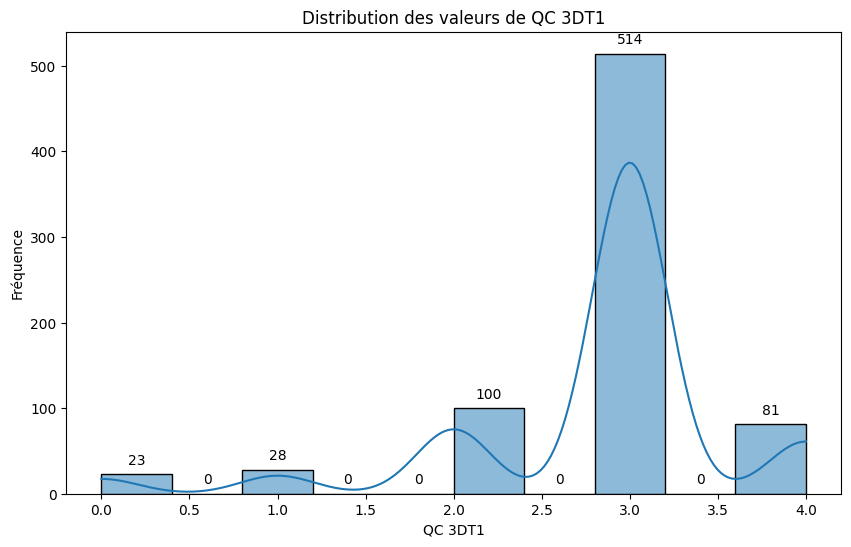

In [34]:
# Extraire la colonne commençant par "QC 3DT1"
qc_3dt1_column = df_mri_data_M00.filter(like='QC 3DT1').iloc[:, 0]

# Créer l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(qc_3dt1_column.dropna(), bins=10, kde=True)
plt.title('Distribution des valeurs de QC 3DT1')
plt.xlabel('QC 3DT1')
plt.ylabel('Fréquence')
# Afficher les valeurs sur l'histogramme
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

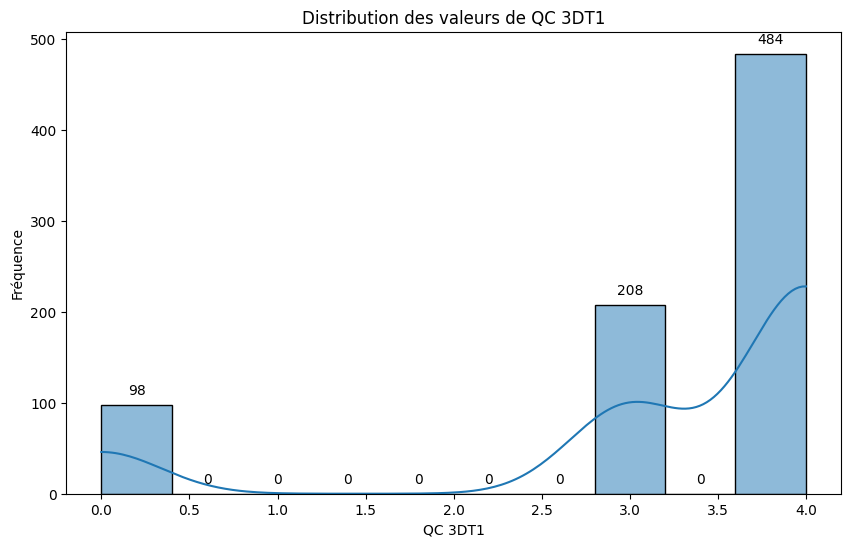

In [35]:
# Extraire la colonne commençant par "QC 3DT1"
qc_3dt1_column = df_mri_data_M00.filter(like='décision 3DT1').iloc[:, 0]

# Créer l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(qc_3dt1_column.dropna(), bins=10, kde=True)
plt.title('Distribution des valeurs de QC 3DT1')
plt.xlabel('QC 3DT1')
plt.ylabel('Fréquence')
# Afficher les valeurs sur l'histogramme
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

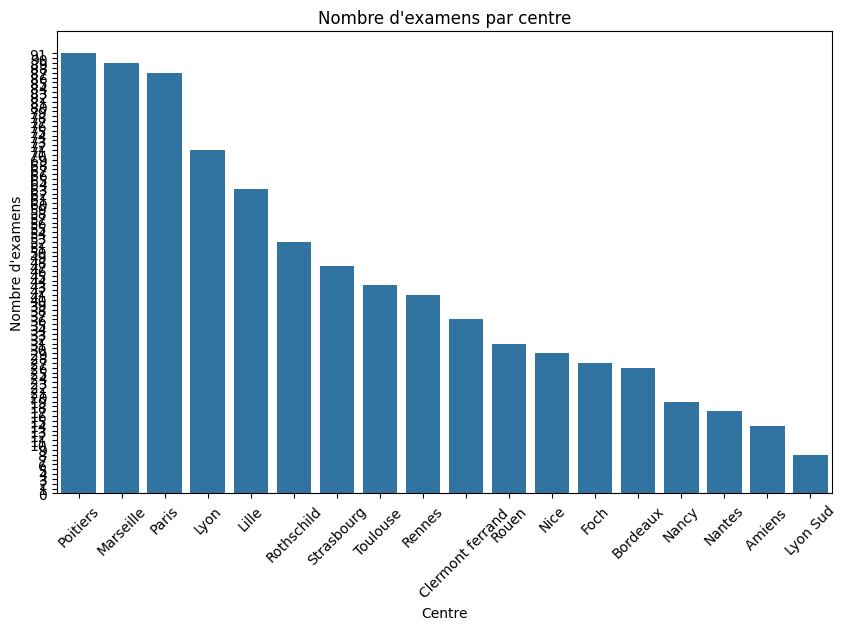

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Compter le nombre d'examens par centre
exam_count_by_centre = df_mri_data_M00['Centre'].value_counts().reset_index()
exam_count_by_centre.columns = ['Centre', 'Nombre d\'examens']

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Centre', y='Nombre d\'examens', data=exam_count_by_centre)
plt.title('Nombre d\'examens par centre')
plt.xlabel('Centre')
plt.ylabel('Nombre d\'examens')
plt.xticks(rotation=45)

# Définir les ticks de l'axe des ordonnées pour n'afficher que des valeurs entières
plt.yticks(range(0, exam_count_by_centre['Nombre d\'examens'].max() + 1))

plt.show()
# Sauvegarder la figure
plt.savefig(os.path.join(STUDY_PATH,'nombre_examens_par_centre.png'))

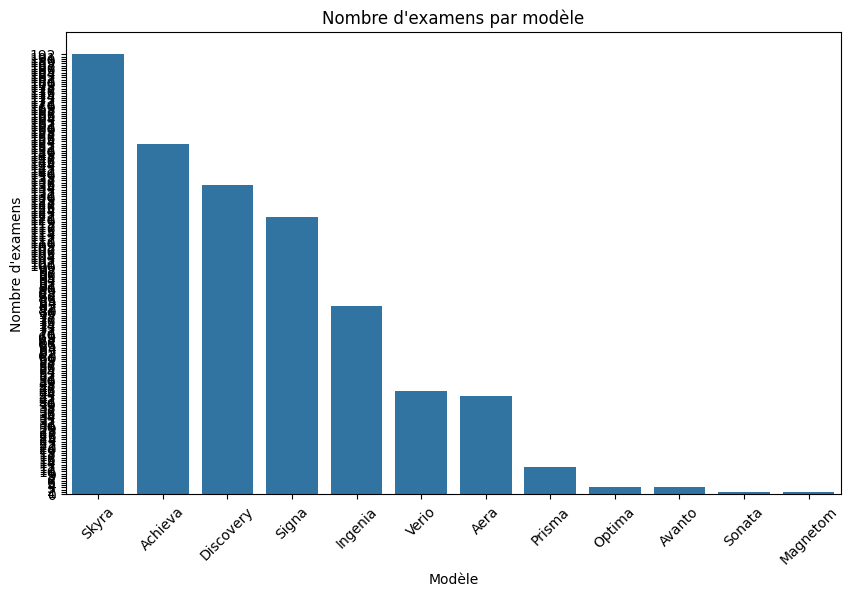

<Figure size 640x480 with 0 Axes>

In [28]:
# Compter le nombre d'examens par modèle
exam_count_by_modele = df_mri_data_M00['modèle'].value_counts().reset_index()
exam_count_by_modele.columns = ['modèle', 'Nombre d\'examens']

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='modèle', y='Nombre d\'examens', data=exam_count_by_modele)
plt.title('Nombre d\'examens par modèle')
plt.xlabel('Modèle')
plt.ylabel('Nombre d\'examens')
plt.xticks(rotation=45)

# Définir les ticks de l'axe des ordonnées pour n'afficher que des valeurs entières
plt.yticks(range(0, exam_count_by_modele['Nombre d\'examens'].max() + 1))

plt.show()
plt.savefig(os.path.join(STUDY_PATH,'nombre_examens_par_machine.png'))

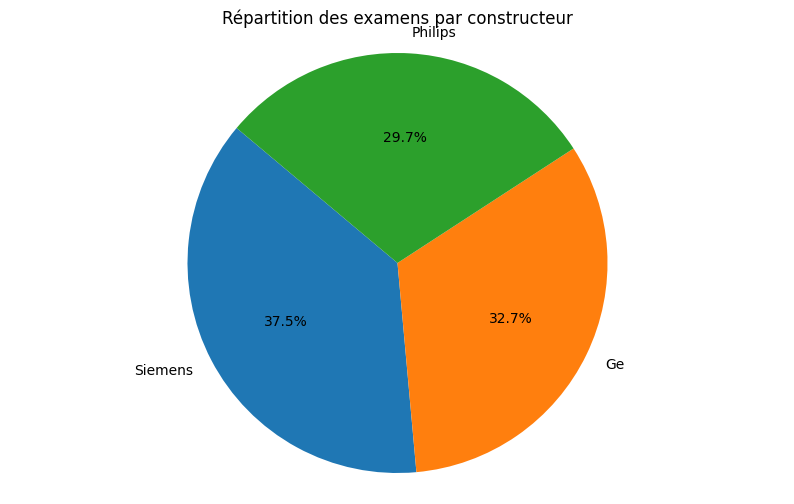

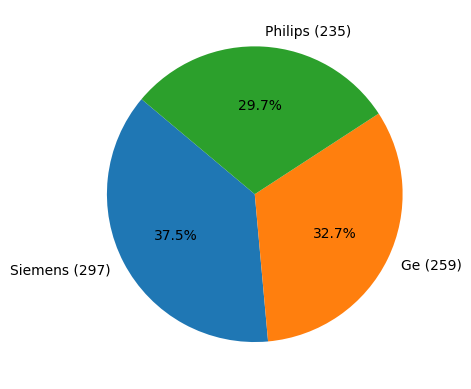

In [27]:
# Compter le nombre d'examens par constructeur
exam_count_by_constructeur = df_mri_data_M00['constructeur'].value_counts().reset_index()
exam_count_by_constructeur.columns = ['constructeur', 'Nombre d\'examens']

# Créer le diagramme circulaire
plt.figure(figsize=(10, 6))
plt.pie(exam_count_by_constructeur['Nombre d\'examens'], labels=exam_count_by_constructeur['constructeur'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des examens par constructeur')
plt.axis('equal')  # Assure que le diagramme est circulaire

plt.show()
# Ajouter une légende avec le nombre d'examens
labels = [f'{constructeur} ({count})' for constructeur, count in zip(exam_count_by_constructeur['constructeur'], exam_count_by_constructeur['Nombre d\'examens'])]
plt.pie(exam_count_by_constructeur['Nombre d\'examens'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.savefig(os.path.join(STUDY_PATH,'nombre_examens_par_constructeur.png'))